# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

571

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

print("Beginning Data Retrieval\n------------------------------")

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | saint-joseph
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | luksuhin
Processing Record 5 of Set 1 | batagay
Processing Record 6 of Set 1 | ketchikan
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | belmonte
Processing Record 10 of Set 1 | lebu
City not found. Skipping...
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | rawson
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | loukhi
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | dayong
Processing Record 20 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 21 of Set 1 | amazar
Processing Record 22 of Set 1 | palm

Processing Record 39 of Set 4 | lodja
Processing Record 40 of Set 4 | mountain home
Processing Record 41 of Set 4 | haines junction
Processing Record 42 of Set 4 | pasighat
Processing Record 43 of Set 4 | mubi
Processing Record 44 of Set 4 | tecpan
Processing Record 45 of Set 4 | san quintin
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | sungaipenuh
Processing Record 48 of Set 4 | westport
Processing Record 49 of Set 4 | san cristobal
City not found. Skipping...
Processing Record 1 of Set 5 | labuhan
Processing Record 2 of Set 5 | batsfjord
Processing Record 3 of Set 5 | teguldet
Processing Record 4 of Set 5 | coahuayana
Processing Record 5 of Set 5 | nikolskoye
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 5 | dunedin
Processing Record 7 of Set 5 | hofn
Processing Record 8 of Set 5 | richards bay
Processing Record 9 of Set 5 | les cayes
Processing Record 10 of Set 5 | severo-kurilsk
Processing Record 11 of Set 5 | vaitape
Pro

Processing Record 30 of Set 8 | anda
Processing Record 31 of Set 8 | truro
Processing Record 32 of Set 8 | ayan
Processing Record 33 of Set 8 | barabai
Processing Record 34 of Set 8 | amos
Processing Record 35 of Set 8 | mindelo
City not found. Skipping...
Processing Record 36 of Set 8 | flagstaff
Processing Record 37 of Set 8 | nurota
City not found. Skipping...
Processing Record 38 of Set 8 | ardabil
Processing Record 39 of Set 8 | casa grande
Processing Record 40 of Set 8 | khani
Processing Record 41 of Set 8 | gandorhun
Processing Record 42 of Set 8 | neepawa
Processing Record 43 of Set 8 | mozarlandia
Processing Record 44 of Set 8 | caxito
Processing Record 45 of Set 8 | ormara
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 8 | pisco
Processing Record 47 of Set 8 | nova olimpia
Processing Record 48 of Set 8 | springbok
Processing Record 49 of Set 8 | alyangula
Processing Record 1 of Set 9 | chhatarpur
Processing Record 2 of Set 9 | paamiut
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates,    
}

# establish dataframe
weather_df = pd.DataFrame(weather_dict)

#export to CSV
weather_df.to_csv("../output_data/cities.csv", index = False)

#data frame count
weather_df.count()

City          504
Lat           504
Lng           504
Max Temp      504
Humidity      504
Cloudiness    504
Wind Speed    504
Country       504
Date          504
dtype: int64

In [5]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,souillac,-20.52,57.52,69.80,64,75,17.22,MU,1596434116
1,saint-joseph,-21.37,55.62,69.80,64,90,18.34,RE,1596434116
2,busselton,-33.65,115.33,57.99,64,20,9.69,AU,1596434014
3,luksuhin,14.10,120.88,93.99,58,96,9.17,PH,1596434116
4,batagay,67.63,134.63,69.30,38,99,7.63,RU,1596434116


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#check any Humidity over 100
weather_df.loc[weather_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

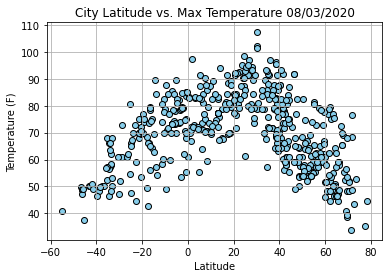

In [10]:
# scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors="black",facecolors="skyblue" )
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("../output_data/City Latitude vs. Max Temperature.png")

# show plot
plt.show()

### This plot shows that the closer a city is to the equator the greater the temperature. 

## Latitude vs. Humidity Plot

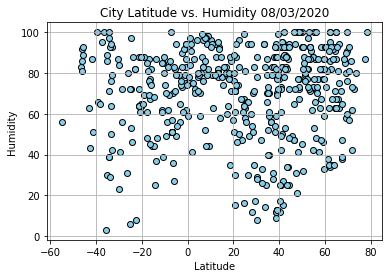

In [11]:
# scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors="black",facecolors="skyblue")
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("../output_data/City Latitude vs. Humidity.png")

# show plot
plt.show()

### This plot shows that humidity is relativley the high at all latitudes. 

## Latitude vs. Cloudiness Plot

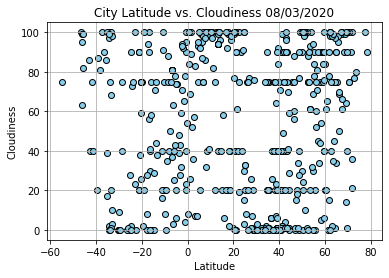

In [12]:
# scatter plot 
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors="black",facecolors="skyblue" )
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

# show plot
plt.show()

### This plot shows that cloudiness isn't really impacted by the latitude of a city. Cloudiness can vary widely. 

## Latitude vs. Wind Speed Plot

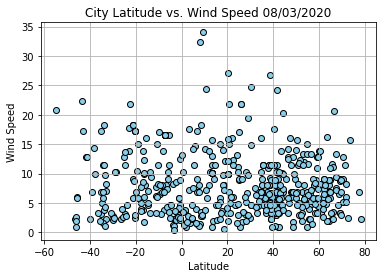

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o",edgecolors="black",facecolors="skyblue" )

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

### This plot shows that wind speeds are pretty uniform across latitude's. It does have a highter concentration of lower wind speeds around a latitude of 40. 

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = weather_df.loc[weather_df["Lat"] >= 0]
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,luksuhin,14.10,120.88,93.99,58,96,9.17,PH,1596434116
4,batagay,67.63,134.63,69.30,38,99,7.63,RU,1596434116
5,ketchikan,55.34,-131.65,57.20,100,90,6.93,US,1596434030
6,yellowknife,62.46,-114.35,75.00,82,40,5.82,CA,1596434116
13,jamestown,42.10,-79.24,64.99,100,90,9.17,US,1596434117


In [16]:
southern_hemi = weather_df.loc[weather_df["Lat"] < 0]
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,souillac,-20.52,57.52,69.80,64,75,17.22,MU,1596434116
1,saint-joseph,-21.37,55.62,69.80,64,90,18.34,RE,1596434116
2,busselton,-33.65,115.33,57.99,64,20,9.69,AU,1596434014
7,bluff,-46.60,168.33,49.84,83,100,2.24,NZ,1596434116
8,belmonte,-15.86,-38.88,64.40,82,75,8.05,BR,1596434117


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.36602151379138215


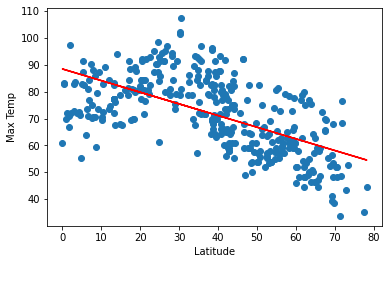

In [17]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Northern Hemi - Max Temp vs. Latitude.png")


#plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.512392261666042


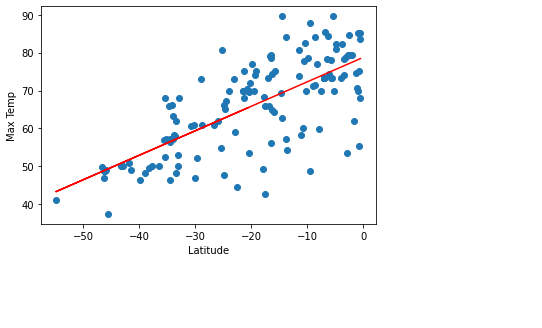

In [18]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Southern Hemi - Max Temp vs. Latitude.png")


#plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36602151379138215


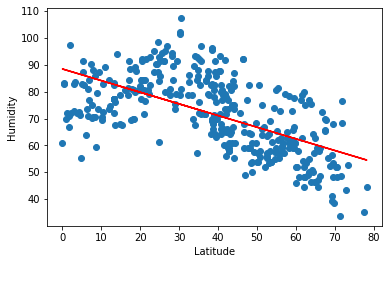

In [19]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Northern Hemi - Humidity vs. Latitude.png")


#plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.512392261666042


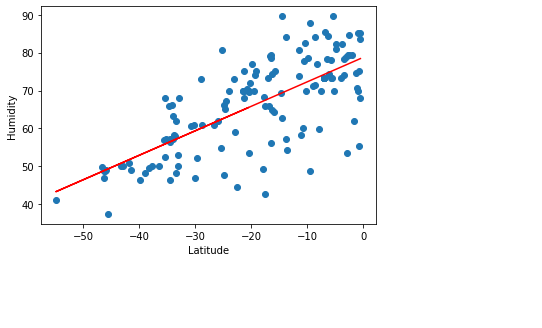

In [20]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Southern Hemi - Humidity vs. Latitude.png")


#plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00032378798376550804


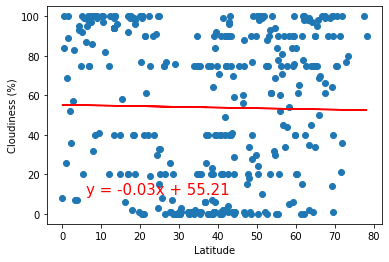

In [21]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Northern Hemi - Cloudiness vs. Latitude.png")


#plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003822047771091363


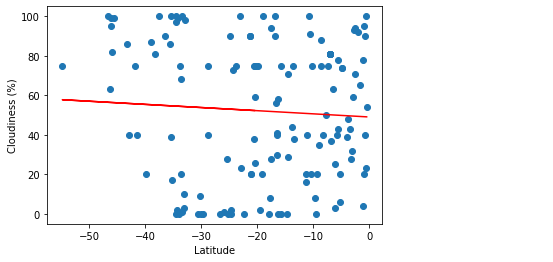

In [22]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Southern Hemi - Cloudiness vs. Latitude.png")


#plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005426696825275542


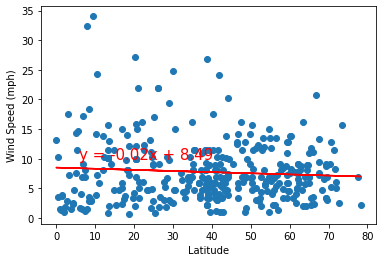

In [23]:
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Northern Hemi - Wind Speed vs. Latitude.png")


#plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0040174394910933294


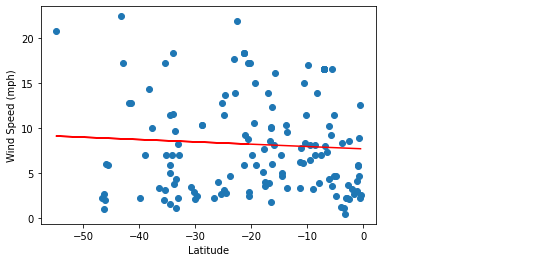

In [24]:
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("../output_data/Southern Hemi - Wind Speed vs. Latitude.png")


#plot
plt.show()